# Fibonacci sequence 

Fibonacci  - https://en.wikipedia.org/wiki/Fibonacci Leonardo Bonacci, Leonardo of Pisa, or Leonardo Bigollo Pisano ('Leonardo the Traveller from Pisa')  

$$
 f_n = \left\{ 
 \begin{array}{lll}
 0& if & n=0\\
 1& if & n=1\\
 f_{n-1} +   f_{n-2} & if & n> 1 \text{ (otherwise)}\\
 \end{array}
   \right.
$$



## Fibonacci recursive algorithm $O\left( \left(  \frac{1+\sqrt(5)}{2}  \right)^n  lg\ n\right)$ [Relaxed asymptotic bound $O(2^n\ lg\ n)$]

In [7]:
# fibR - Fibonacci Recursive O( ( (1+sqrt(5)/2 )^n lg n ) [Relaxed asymptotic bound O(2^n lg n)] 
def fibR(n):
    if n==0 :
        return 0
    if n==1 :
        return 1
    return fibR(n-1)+fibR(n-2)    # for large n´s  the addition will take lg n stetp because the numebers are very large

https://www.geeksforgeeks.org/time-process_time-function-in-python/

We define a function to calculate the time that to get the n-fibonacci number through the recursive methods

In [11]:
from time import process_time
def fib_recursive_time(n):
    if n==0 :
        return 0
    if n==1 :
        return 1

    t0 = process_time() 
    x = fib_recursive_time(n-1)
    tf =process_time() 
    tiempos[n-1] = tf- t0
     
    y = fib_recursive_time(n-2)
    return x+y 

We had n = 40 because for n = 50 the time took too long

In [12]:
n = 40
tiempos = list(range(n))
fib_recursive_time(n)

102334155

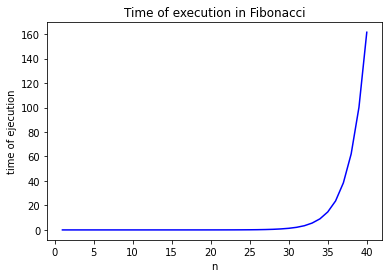

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1,41), tiempos,color='blue')
plt.title('Time of execution in Fibonacci')
plt.xlabel('n')
plt.ylabel('time of ejecution');

# Fibonacci iterartive algoritm linear $O(n\ lgn)$

In [17]:
# fibI - Fibonacci Iterartive O(n lgn)
def fib_iterative_linear(n):
    
    t0 = process_time() 
    a, b = 0,1
    tf =process_time() 
    tiempos_iterative[0] = tiempos_iterative[1] = tf -t0
    for i in range(2, n+2):
        a, b = b, a + b
        tf = process_time() 
        tiempos_iterative[i-1] =  tf - t0
    return a

In [18]:
n = 1000
tiempos_iterative = list(range(n + 1))
fib_iterative_linear(n)

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

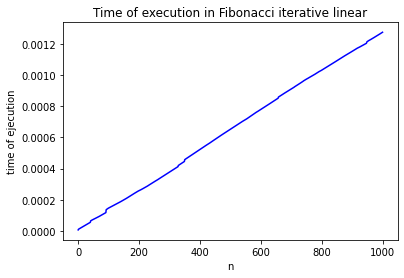

In [19]:
plt.plot(range(1001), tiempos_iterative,color='blue')
plt.title('Time of execution in Fibonacci iterative linear')
plt.xlabel('n')
plt.ylabel('time of ejecution');

# Fibonacci  binary exponentiation matrix algorithm $O(lg^2 n) $

The Fibonacci Q-matrix | Lecture 6 | Fibonacci Numbers and the Golden Ratio https://youtu.be/lTHVwsHJrG0

Exercise 0.4. Dasgupta S., Papadimitriou C., Vazirani U. , “Algorithms” , McGraw Hill, 2007.

Fast matrix solution https://stackoverflow.com/a/40117659

This is a superfast solution refer to https://stackoverflow.com/a/23462371/3700852

You can read some more about involved math here https://en.wikipedia.org/wiki/Fibonacci_number#Matrix_form

Efficient calculation of Fibonacci series https://stackoverflow.com/questions/18172257/efficient-calculation-of-fibonacci-series

Python: Compute a Huge Fibonacci Number Modulo m https://stackoverflow.com/questions/40096097/python-compute-a-huge-fibonacci-number-modulo-m#:~:text=Pisano%20periods%20follows%20a%20Fibonacci,in%20finding%20the%20Pisano%20period.

Binary Exponentiation https://cp-algorithms.com/algebra/binary-exp.html

Exponentiation by squaring https://en.wikipedia.org/wiki/Exponentiation_by_squaring 

In [33]:
# Fibonacci fast matrix O(lg^2 n) - https://stackoverflow.com/a/40117659  

def fib_fast_matrix(n):

    if n==0: return 0

    # Initialize a matrix [[1,1],[1,0]]    
    v1, v2, v3 = 1, 1, 0  
    # Perform fast exponentiation of the matrix (quickly raise it to the nth power)
    for rec in bin(n)[3:]:
        calc = (v2*v2) 
        v1, v2, v3 = (v1*v1+calc) , ((v1+v3)*v2) , (calc+v3*v3) 
        if rec == '1': v1, v2, v3 = (v1+v2), v1, v2
    return v2;    

In [38]:
 n = 1000
 tiempos_iterative_log = list(range(n+1));
 for n in range(0, n+1):
    t0 = process_time() 
    fib_fast_matrix(n)
    tf = process_time() 
    tiempos_iterative_log [n] = tf -t0


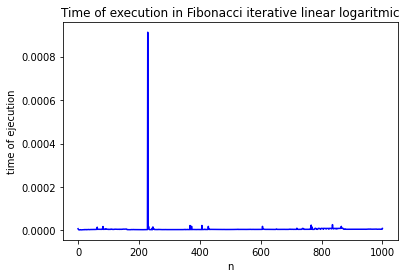

In [39]:
plt.plot(range(1001), tiempos_iterative_log,color='blue')
plt.title('Time of execution in Fibonacci iterative linear logaritmic')
plt.xlabel('n')
plt.ylabel('time of ejecution');

#Comparisons


###Comparing between iterative algorithms, having x = n

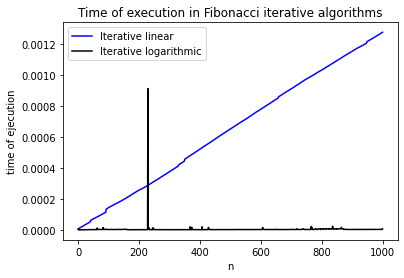

In [40]:
plt.plot(range(1001), tiempos_iterative,color='blue', label = 'Iterative linear')
plt.plot(range(1001), tiempos_iterative_log,color='black', label = 'Iterative logarithmic')
plt.title('Time of execution in Fibonacci iterative algorithms')
plt.xlabel('n')
plt.ylabel('time of ejecution')
plt.legend();

### having y = n

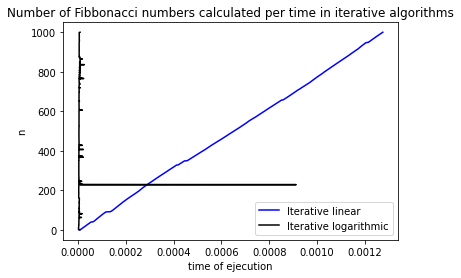

In [41]:
plt.plot(tiempos_iterative,range(1001),color='blue', label = 'Iterative linear')
plt.plot(tiempos_iterative_log, range(1001),color='black', label = 'Iterative logarithmic')
plt.title('Number of Fibbonacci numbers calculated per time in iterative algorithms')
plt.ylabel('n')
plt.xlabel('time of ejecution')
plt.legend();

### Comparison between all three algorithms, x = n 

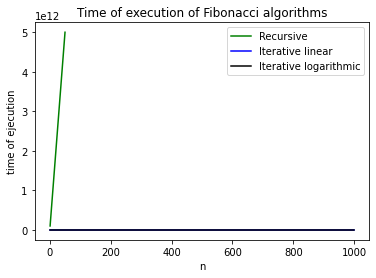

In [44]:
tiempos_iterative = range(1001)
tiempos_iterative_log = range(1001,0,-1)
tiempos = range(100000000000,5100000000000, 100000000000)
plt.plot(range(1,51), tiempos,color='green', label = 'Recursive')
plt.plot(range(1001), tiempos_iterative,color='blue', label = 'Iterative linear')
plt.plot(range(1001), tiempos_iterative_log,color='black', label = 'Iterative logarithmic')
plt.title('Time of execution of Fibonacci algorithms')
plt.xlabel('n')
plt.ylabel('time of ejecution')
plt.legend();

### having y = n 

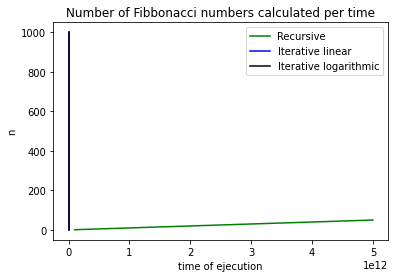

In [43]:
plt.plot( tiempos, range(1,51), color='green', label = 'Recursive')
plt.plot( tiempos_iterative, range(1001), color='blue', label = 'Iterative linear')
plt.plot( tiempos_iterative_log, range(1001), color='black', label = 'Iterative logarithmic')
plt.title('Number of Fibbonacci numbers calculated per time')
plt.ylabel('n')
plt.xlabel('time of ejecution')
plt.legend();